# SpamFilter - Naive Bayes Classifier
##### Submitted By: Yash Choukse

## Description

Naive Bayes classifier uses Bayes' theorem to do classification. It classifies an element into a class by taking into account the features. The classifier is called 'Naive' because it assumes independence between feautures. This is to avoid doing complex calculations and the need for probability data which might not be available.

To make our math calculations easy, we use a few mathematical tricks:

- Remove $\alpha$ as it is just scaling the value.

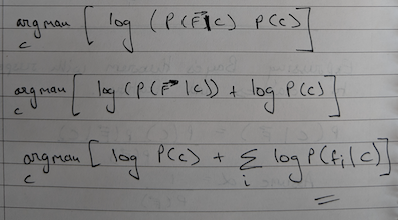

- Take logarithm of the probabilities, so that there is not integer underflow.

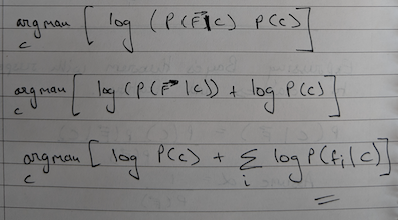



## Code

#### Import python modules

In [246]:
import os
import math
from IPython.display import HTML, display
import tabulate

#### Counts

In [247]:
# counts
ham_frequency = {}  # stores frequency of word occurence as ham
spam_frequency = {}  # stores frequency of word occurence as spam
all_occurences = {} # count of all occurence of word

total_word_count = 0
total_ham_count = 0
total_spam_count = 0

# probabilities (logarithmic values)
ham_probability = {}
spam_probability = {}
class_probability = {}

# test set
truth = {}
prediction = {}

#### Constants

In [248]:
TRAINING_DATASET_PATH = '/Users/zeko/dev/projects/machine_learning/project1/data'
TEST_DATASET_PATH = '/Users/zeko/dev/projects/machine_learning/project1/data/test/'
TEST_DATASET_TRUTH_PATH = '/Users/zeko/dev/projects/machine_learning/project1/data/truth.txt'

#### Methods used to increment/decrement counts

In [237]:
def mark_word_as_ham(word):
    global total_ham_count
    if word in ham_frequency:
        ham_frequency[word] += 1
    else:
        ham_frequency[word] = 1
    total_ham_count += 1
    

def mark_word_as_spam(word):
    global total_spam_count
    if word in spam_frequency:
        spam_frequency[word] += 1
    else:
        spam_frequency[word] = 1
    total_spam_count += 1

def mark_word_occurence(word):
    global total_word_count
    if word in all_occurences:
        all_occurences[word] += 1
    else:
        all_occurences[word] = 1
    total_word_count += 1

#### Method used to Train the model using the training data

In [238]:
def train():
    for root, dirs, files in os.walk(TRAINING_DATASET_PATH):
        if root.endswith('ham'):
            for filename in files:
                url = root + '/' + filename
                with open(url) as f:
                    content = f.readlines()
                    content = [x.strip().lower() for x in content]
                for word in content:
                    mark_word_as_ham(word)
                    mark_word_occurence(word)
        elif root.endswith('spam'):
            for filename in files:
                url = root + '/' + filename
                with open(url) as f:
                    content = f.readlines()
                    content = [x.strip().lower() for x in content]
                for word in content:
                    mark_word_as_spam(word)
                    mark_word_occurence(word)

#### Method to calculate P(C)

In [239]:
def calculate_class_probability():
    ham_prob = total_ham_count / total_word_count
    class_probability['ham'] = math.log(ham_prob)
    class_probability['spam'] = math.log(1 - ham_prob)

#### Method to calculate P(W|C)

In [240]:
def calculate_word_probability():
    all_words = all_occurences.keys()
    for word in all_words:
        if word in ham_frequency:
            ham_prob = ham_frequency[word] / all_occurences[word]
            spam_prob = 1 - ham_prob
        else:
            spam_prob = spam_frequency[word] / all_occurences[word]
            ham_prob = 1 - spam_prob
        
        if ham_prob == 0:
            ham_probability[word] = 0
            ham_probability[word] = float('-inf')
        else:
            ham_probability[word] = math.log(ham_prob)
        if spam_prob == 0:
            spam_probability[word] = 0
            spam_probability[word] = float('-inf')
        else:
            spam_probability[word] = math.log(spam_prob)

#### Method to classify email
The maxValue is taken as NEGATIVE INFINITY because we are dealing with logarithmic values and not probabilities. The log of probabilities will be negative as the probabilities are between 0 and 1. Thus value will be a negative number and we need to find the class that gives the greatest value (argMax)

In [241]:
def classify_email(email):
    maxValue = float('-inf')
    argMax = 'ham'
    for c in ['ham','spam']:
        value = class_probability[c]
        for word in email:
            if word in all_occurences.keys():
                if c is 'ham':
                    value += ham_probability[word]
                else:
                    value += spam_probability[word]
        if value > maxValue:
            argMax = c
            maxValue = value
    return argMax

#### Method to iterate over all emails in the test data set

In [242]:
def classify_all_emails():
    for root, dirs, files in os.walk(TEST_DATASET_PATH):
        for filename in files:
            url = TEST_DATASET_PATH + filename
            with open(url) as f:
                    email = f.readlines()
                    email = [x.strip().lower() for x in email]
                    email_id = filename.replace('.words','')
                    prediction[email_id] = classify_email(email)
                    

#### Method to read the truth about the test dataset

In [243]:
def read_test_set_truth():
    url = TEST_DATASET_TRUTH_PATH
    with open(url) as f:
        data = f.readlines()
    for line in data:
        pair = line.split()
        truth[pair[0]] = pair[1].lower()

#### Method to display results

In [244]:
def display_results():
    email_ids = list(truth.keys())
    email_ids = sorted(email_ids, key=lambda x: int(x))
    
    total_entries = len(email_ids)
    correct_prediction_count = 0
    
    table = []
    table.append(['Email #','Prediction','Truth'])
    
    for email_id in email_ids:
        table.append([email_id, prediction[email_id], truth[email_id]])
        if prediction[email_id] == truth[email_id]:
            correct_prediction_count += 1
    
    display(HTML(tabulate.tabulate(table, tablefmt='html')))
    print()
    print("Accuracy: " + str(correct_prediction_count / total_entries))

#### Runner methods and Results

In [249]:
train()
calculate_class_probability()
calculate_word_probability()
read_test_set_truth()
classify_all_emails()
display_results()

Email #,Prediction,Truth
1,spam,spam
2,ham,ham
3,ham,ham
4,ham,ham
5,ham,spam
6,ham,ham
7,ham,ham
8,ham,ham
9,ham,ham
10,spam,spam



Accuracy: 0.83
